In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load Dataset
df = pd.read_csv("/content/employee_attrition_previous_closure.csv")

# Check Missing Values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print("Missing Values (%):\n", missing_percent[missing_percent > 0])

# Handle Missing Values
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))  # Fill numeric with median
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))  # Fill categorical with mode

# Encode Categorical Variables
label_enc_cols = ['Attrition']  # Binary category
one_hot_cols = [col for col in cat_cols if col not in label_enc_cols]  # Multi-class categories

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])  # Label encoding for binary columns

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # One-hot encoding for categorical columns

# 2.3 Standardize Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Display processed dataset sample
print("Processed Data Sample:\n", df.head())


Missing Values (%):
 Age                 13.216715
BusinessTravel       0.485909
DailyRate            2.623907
DistanceFromHome     9.232264
MaritalStatus        0.485909
dtype: float64
Processed Data Sample:
    Attrition       Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          0  1.392809   0.808522         -1.088747  -0.847202            0.0   
1          0 -0.206490  -1.452240         -0.466761  -0.847202            0.0   
2          1 -1.920025  -1.151634         -0.342364  -1.796844            0.0   
3          0  1.392809   1.106645         -0.217967   0.102440            0.0   
4          0  1.621280   0.480587         -0.342364   1.052081            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0       -0.045160                 1.201147   -0.033242        0.403897  ...   
1       -1.396630                -0.623178    0.846345        0.403897  ...   
2        1.246904                -0.623178   -1.743551        0.40

In [16]:
df = pd.read_csv("processed_employee_attrition.csv")


In [17]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
 [[170   1]
 [ 29   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       171
           1       0.86      0.17      0.29        35

    accuracy                           0.85       206
   macro avg       0.86      0.58      0.60       206
weighted avg       0.85      0.85      0.81       206


ROC AUC Score: 0.8197159565580618


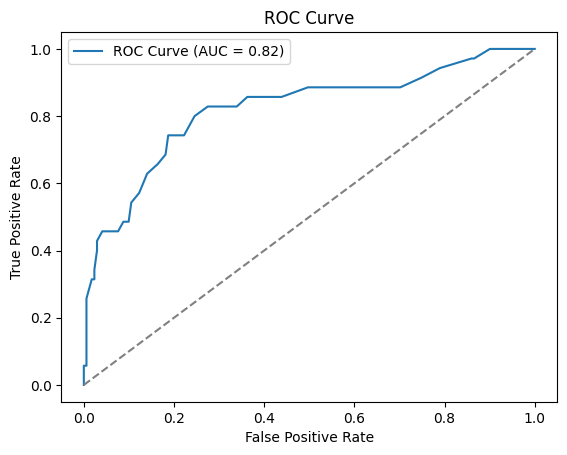

In [21]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


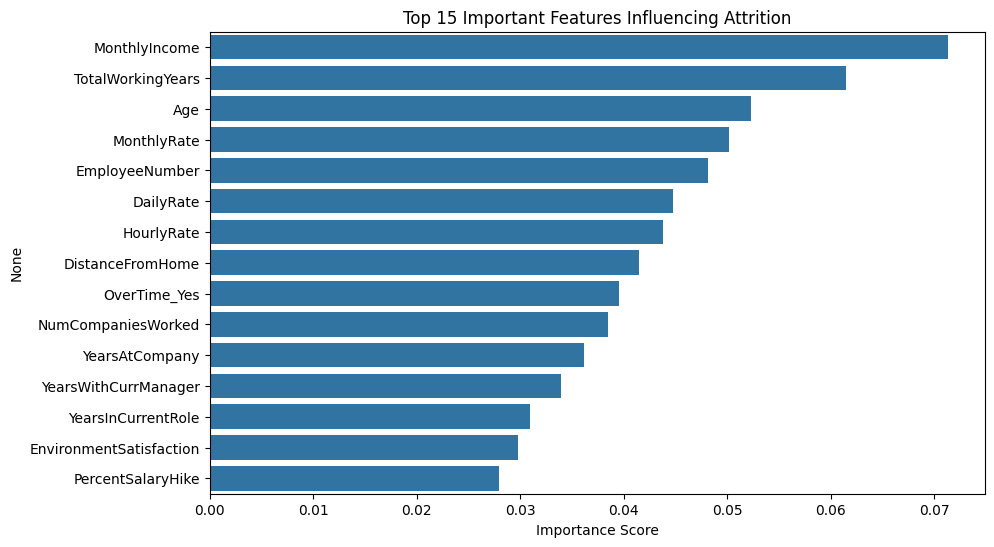

In [22]:
import pandas as pd
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:15], y=feature_importances[:15].index)
plt.title("Top 15 Important Features Influencing Attrition")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
## Key Predictors of Attrition After RCC

Based on the model's feature importance analysis, the following factors are most influential in predicting whether an employee will accept an RCC:

1. **TotalWorkingYears**
   Employees with longer overall work experience may be more willing to accept an RCC due to nearing retirement, confidence in external opportunities, or fatigue with corporate life.

2. **YearsAtCompany**
   Employees with shorter tenures are generally less attached to the organization and may be more open to separation.

3. **OverTime**
   Employees frequently working overtime could be experiencing burnout or low work-life balance, making an RCC offer more attractive.

4. **JobRole**
   Certain roles may be more affected by the restructuring process, influencing decisions to stay or leave.

5. **Age**
   Older employees may see the RCC as a form of early retirement and accept it more readily.

6. **WorkLifeBalance & EnvironmentSatisfaction**
   Employees who are dissatisfied with their work-life balance or workplace environment are more likely to accept the offer.

# Strategic Implication
These findings suggest that restructuring plans and RCC packages should be tailored based on employee profiles. For example, high-tenure, high-stress employees may require more engagement or transition support, while those with shorter tenure or poor job satisfaction may need less persuasion to accept an RCC.

Understanding these key drivers helps SFB not only manage attrition more effectively but also support its employees with empathy and data-driven insights.


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the Lyon data
lyon_df = pd.read_csv("/content/employee_attrition_lyon.csv")
original_order_df = lyon_df.copy()  # to preserve row order if needed

# 2. Handle missing values
num_cols_lyon = lyon_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_lyon = lyon_df.select_dtypes(include=['object']).columns

# Fill missing numerical values with median
lyon_df[num_cols_lyon] = lyon_df[num_cols_lyon].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with mode
lyon_df[cat_cols_lyon] = lyon_df[cat_cols_lyon].apply(lambda x: x.fillna(x.mode()[0]))

# 3. Encode categorical variables
label_enc_cols = ['Attrition'] if 'Attrition' in lyon_df.columns else []
one_hot_cols = [col for col in cat_cols_lyon if col not in label_enc_cols]

# Drop 'Attrition' if present (since we are predicting it)
lyon_df = lyon_df.drop(columns=label_enc_cols, errors='ignore')

# Apply the same one-hot encoding as training
lyon_df = pd.get_dummies(lyon_df, columns=one_hot_cols, drop_first=True)

# 4. Align features with training data
# Add missing columns with 0 and drop extra columns
missing_cols = set(X.columns) - set(lyon_df.columns)
for col in missing_cols:
    lyon_df[col] = 0

# Drop extra columns not in training data
lyon_df = lyon_df[X.columns]  # reorder columns to match

# 5. Standardize numeric columns using same scaler
scaler = StandardScaler()
scaler.fit(X[num_cols_lyon])  # fit on training numeric features only
lyon_df[num_cols_lyon] = scaler.transform(lyon_df[num_cols_lyon])

# 6. Predict probabilities
attrition_probs = model.predict_proba(lyon_df)[:, 1]




In [24]:
# 7. Save to CSV
pd.DataFrame(attrition_probs, columns=["Attrition_Probability"]).to_csv("attrition_prediction.csv", index=False)


In [25]:
from google.colab import files
files.download("attrition_prediction.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>